### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})


# **Problem Statement**

According to the annual United States road crash statistics by ASIRT, more than 38,000 people die every year in crashes on U.S. roadways. The U.S. traffic fatality rate is 12.4 deaths per 100,000 inhabitants. It is apparent that with the increasing number of vehicles on urban and suburban roads, the cases of vehicle accidents are also increasing. Our objective is to analyse vehicle collision data and derive some useful insights.
Vehicle collisions along with its severity might be useful to derive insights and may show some pattern with the environmental factors like weather, road conditions etc.
The dataset consists of 40 columns having different kinds of data like, collision severity, road conditions, number of people involved, location of collision, weather etc.

# **Exploratory Data Analysis**

<h2>Characteristics of the dataset:</h2>
<p>There are 194673 entries and 38 features in this dataset.<br><b>The objective of this project is to distinguish the reason for street mishaps and the degree of severity.</b> That's why we can categorize this attributes into some points.</p>
<ul>
    <li><b>Severity</b></li>
    <p>A detailed description of the severity of the collision. A code that corresponds to the severity of the collision:</p>
        <ul>
            <li>1: Property damage</li>
            <li>2: Injury</li>
        </ul>
    <p>This includes features like SEVERITYCODE, SEVERITYCODE.1, SEVERITYDESC.</p>
    <li><b>Date and Time</b></li>
    <p>This includes the features of the date and time of the incident, like INCDATE, INCDTTM.</p>
    <li><b>Area Description</b></li>
    <p>This is mainly the description of the general location of the collision. X, Y, INCKEY, COLDETKEY, ADDRTYPE, INTKEY, LOCATION, JUNCTIONTYPE, SEGLANEKEY, CROSSWALKKEY are included here.</p>
    <li><b>Individuals</b></li>
    <p>This includes if pedestrians, cyclists or vehicles are involved. This is entered by the state. The features are PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT and VEHCOUNT.</p>
    <li><b>Environment and Weather</b></li>
    <p>This includes the environmental conditions like WEATHER, ROADCOND and LIGHTCOND</p>
    <li><b>Information of the incident</b></li>
    <p>This includes the type of the incident like COLLISIONTYPE, SPEEDING and HITPARKEDCAR.</p>
    <li><b>Other features</b></li>
    <p>This includes some other relevant informations like OBJECTID, COLDETKEY, REPORTNO, STATUS, EXCEPTRSNCODE, EXCEPTRSNDES, SDOT_COLCODE, SDOT_COLDESC, INATTENTIONIND, UNDERINFL, PEDROWNOTGRNT, SDOTCOLNUM, ST_COLCODE and ST_COLDESC</p>
</ul>

In [2]:
df = pd.read_csv('Data-Collisions.csv')

/home/tasnima/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_g = df.groupby('SEVERITYCODE')
df_balanced = df_g.apply(lambda x: x.sample(df_g.size().min()))

In [5]:
df_balanced['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [6]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [88]:
  
data_missing = {'Variable':["X", "Y", "ADDRTYPE", "INTKEY", "Location", "EXCEPTRSNCODE", "COLLISIONTYPE", "JUNCTIONTYPE", "INATTENTIONIND", "UNDERINFL", 
                    "WEATHER", "ROADCOND", "LIGHTCOND", "PEDROWNOTGRNT", "SDOTCOLNUM", "SPEEDING", "ST_COLCODE" ,"ST_COLDESC"], 
        'Missing Values': [5334, 5334, 1926, 129603, 2677, 109862, 4904, 6329, 164868, 4884, 5081, 5012, 5170, 190006, 79737, 185340, 18, 4904]} 
  
# Create DataFrame 
df_missing_values = pd.DataFrame(data_missing) 
  
# Print the output. 
print(df_missing_values) 

          Variable  Missing Values
0                X            5334
1                Y            5334
2         ADDRTYPE            1926
3           INTKEY          129603
4         Location            2677
5    EXCEPTRSNCODE          109862
6    COLLISIONTYPE            4904
7     JUNCTIONTYPE            6329
8   INATTENTIONIND          164868
9        UNDERINFL            4884
10         WEATHER            5081
11        ROADCOND            5012
12       LIGHTCOND            5170
13   PEDROWNOTGRNT          190006
14      SDOTCOLNUM           79737
15        SPEEDING          185340
16      ST_COLCODE              18
17      ST_COLDESC            4904


### **Relation of severity with different categorical varibales**

#### **Relation Between Severity and Address type**

> <p> In the following section we present a plot that desrcirbes the number of accident cases with respect to different types of addreses.</p>



Text(0.5, 1.0, 'Accidents vs Address type')

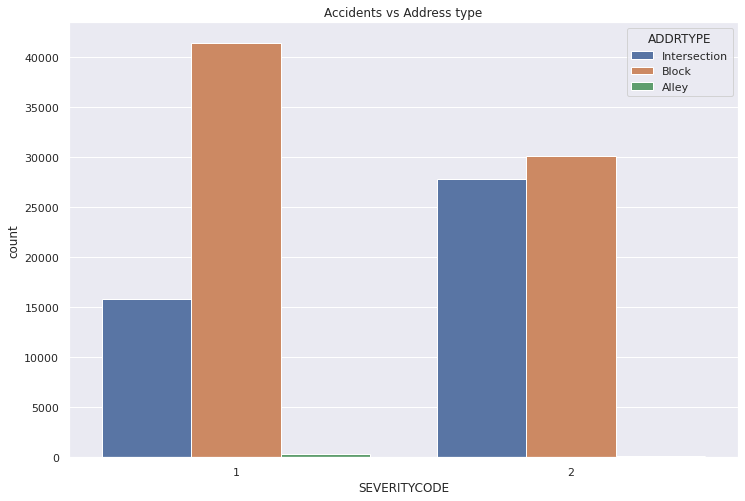

In [89]:
sns.countplot(data=df_balanced,x='SEVERITYCODE',hue='ADDRTYPE').set_title("Accidents vs Address type")


> As we can see from the above plot, number of accidents both property damage and injury cases, is higher in blocks and intersection than alley. This is because of the fact that, traffic congestion is much higher at Blocks. However more injuries occur when the accidents happen at Intersections. Some of the major causes of accidents at intersections are inadequate surveillance, false assumption of other driver’s action, turning with obstructed view, illegal maneuver and disregarded traffic signs which is responsible for more severe injuries. Alleys have very little number of property damage cases and no injury cases as they are often reserved for walks only.






####**Relation Between Severity and Collision Type**

> Following section depicts the relation between severirty of accidents and the type of collision occured by presenting a plot of the number of accidents in collision cases.



Text(0.5, 1.0, 'Accidents vs collision type')

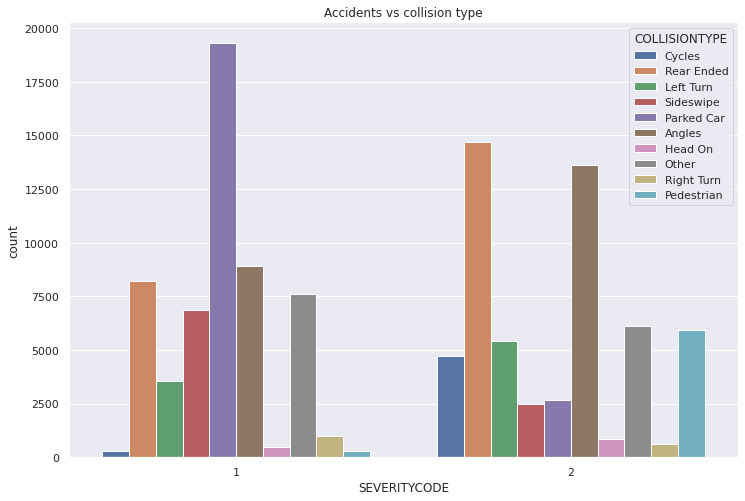

In [90]:
sns.countplot(data=df_balanced,x='SEVERITYCODE',hue='COLLISIONTYPE').set_title("Accidents vs collision type")



> From the above plot we observe that in case of property damage, the most occuring collision type is parked car, that is the collision occured with a parked car and hence the property damage. Drivers entering a parking lot keep an eye on a vacant spot and often neglect to watch for other drivers and pedestrians who are on the move, that's how accidents occur. Many drivers pull ‘head in’ to a parking spot after which they must back out. While backing out, blind zones created by vehicles parked alongside the spot obstruct the driver’s vision.Also traffic laws aren’t enforceable in parking lots, which can create reckless driving and confusion thus leading to collisions.


> Other higher collision type in property damage are angles and rear ended collisions. On the other hand, in case of serious injuries, the most occuring collision is rear ended and cycles, which is self explanatory- if car hits a cycle, in most cases there is bound to be a serious injury.







#### **Relation between Severity and Juntion type**


> Following section shows a plot that depicts a relationship between severirty and junction type by plotting the number of accidents in each case of junction type.



Text(0.5, 1.0, 'Accidents vs Junction type')

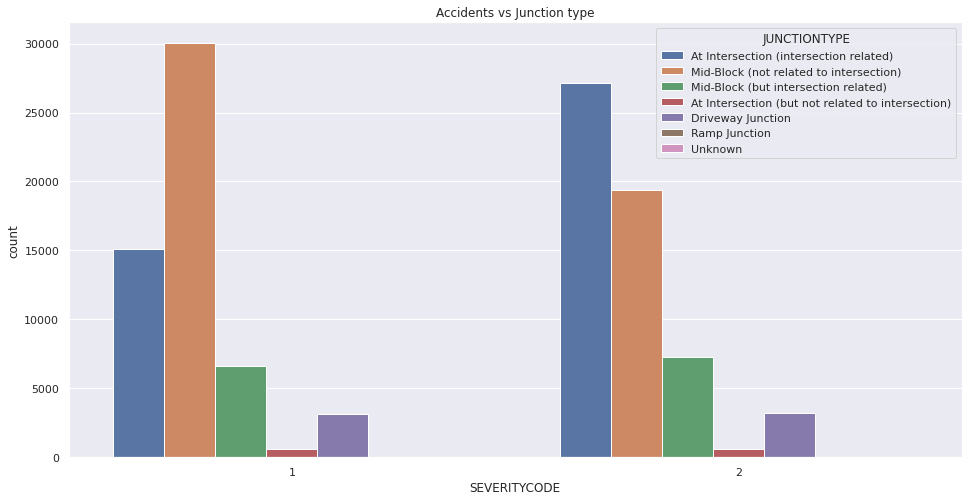

In [113]:
sns.set(rc={'figure.figsize':(16,8)})

sns.countplot(data=df_balanced,x='SEVERITYCODE',hue='JUNCTIONTYPE').set_title("Accidents vs Junction type")



> 





> We see from the plot mid-block(not related to an intersection) has the highest number of property damage cases and injuries occur at intersections(related to other intersections) mostly. This result is understandable as these junctions ought to be the busiest type of junctions.



####**Relation Between Severity and Light Condition**

> The following section shows a plot of accidents counts for each type of light condition. 

Text(0.5, 1.0, 'Accidents vs Light condition')

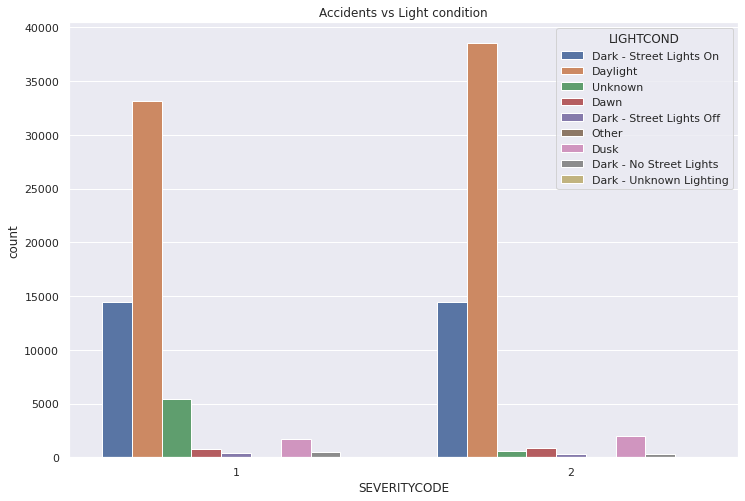

In [92]:
sns.countplot(data=df_balanced,x='SEVERITYCODE',hue='LIGHTCOND').set_title("Accidents vs Light condition")

> As surprising as it may seem, but the plot denotes higher number of accidents during the day - which points to the fact that there are more vehicles and the roads are busier during the day. We would like to add the fact that sun glare can be factor in a sunlit day. Sun glare can temporarily blind a driver, making it impossible for him or her to see what is happening in front of them. Many drivers have reported that a single moment of sun glare can cause serious accidents. We therefore conclude that the sun glare could be a possible reason for daytime accidents. We can deduce from the above plot that,  for both severity cases,  the light conditions are pretty much same. Accident severity cannot be linked to a specific light condition situation, therefore we are assuming it won't be a good predictor.



####**Relation Between Severity and Weather Condition**

> The following section shows a plot of accidents counts for each type of weather condition. 

Text(0.5, 1.0, 'Accidents vs Weather condition')

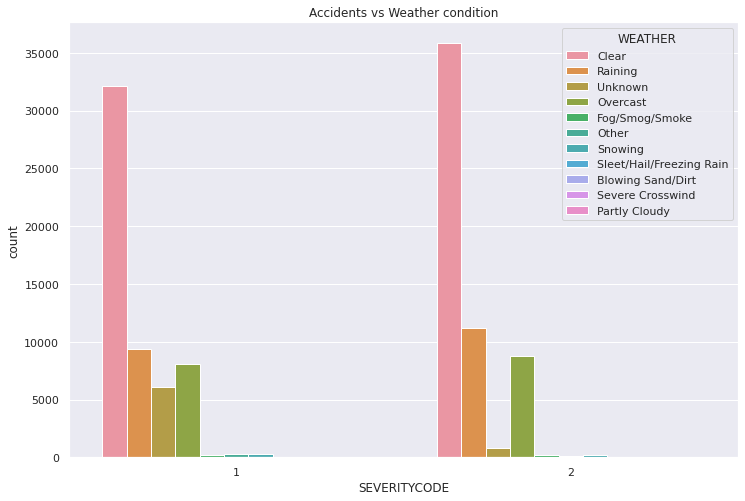

In [93]:
sns.countplot(data=df_balanced,x='SEVERITYCODE',hue='WEATHER').set_title("Accidents vs Weather condition")



> The above plot shows that accidents in both cases higher in clear weather which is not normally what someone would expect. Our intution in this case is that people drive rather recklessly in better weather condition and rather cautiously in bad weather condition. 
Pleasant weather conditions make the environment attractive for vacationers and travelers, which can lead to road congestion. From motorcycle riders to bicyclists and pedestrians, there is simply far more traffic on the roads during that type of weather. Sitting through traffic jams and driving on heavily congested roadways can cause drivers to become frustrated resulting in an increased risk for erratic driving and even road rage.
Cyclists and pedestrians can be difficult for drivers to notice, especially during rush hour and on heavily trafficked roadways. 
Also there tends to be more roadway construction in the clear weather. This, in turn, can increase the risk of collisions. 
Considering weather data, severe accidents are slightly more frequent during rainy weather as well as with wet roads.


###**Inspection of all count variables against SEVERITYCODE** ###

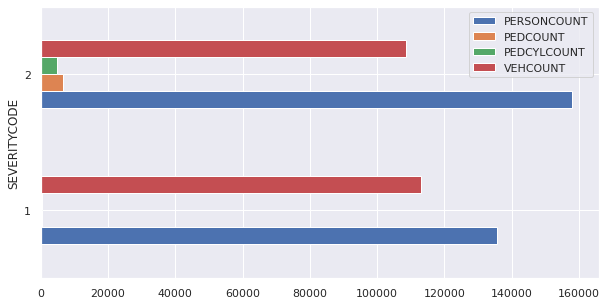

In [94]:
df_balanced[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']].groupby('SEVERITYCODE').sum().plot(kind='barh', figsize=(10, 5))

> It can be clearly seen that injury is more likely to happen when there is pedestrian and pedestrian cycle count. 

### **Accidents visualization time line**. 

In [95]:
df_time = pd.DataFrame()
df_time['SEVERITYCODE']  = df['SEVERITYCODE']
df_time['INCDATE'] = df['INCDATE'].str[:10]
df_time[['YEAR', 'MONTH', 'DAY']] = df['INCDATE'].str.split('/', expand=True)
df_time['DayOfWeek'] = pd.to_datetime(df['INCDATE']).dt.dayofweek

#### **Accidents over the years**


> Following section shows a plot that depicts the number of accidents over years from 2004 to 2020.


Text(0.5, 1.0, 'Accidents Per Year')

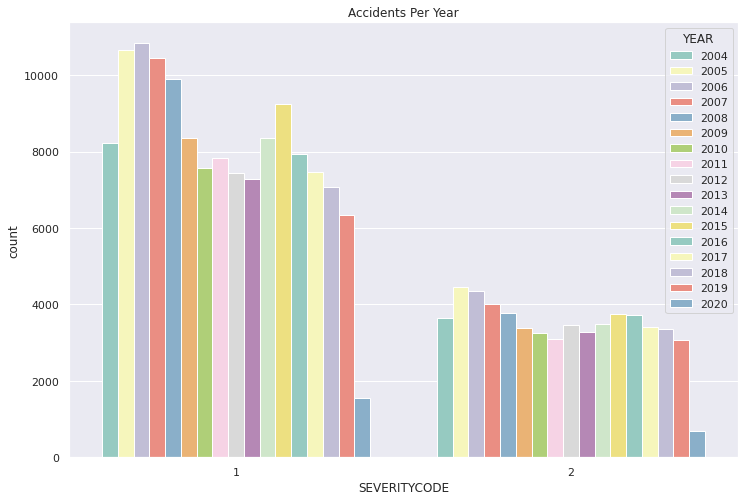

In [96]:
sns.countplot(data=df_time,x='SEVERITYCODE',hue='YEAR',  palette="Set3").set_title("Accidents Per Year")



> Interestingly, from the plot we observe that the number of accidents are decreasing over the years. The improved traffic control systems and increased strictness in traffic rules may have contributed in that.



#### **Accidents over the days of week**


> Following section shows a plot that depicts whether some days of the week are more prone to accidents. 

Text(0.5, 1.0, 'Accidents Per Day of Week')

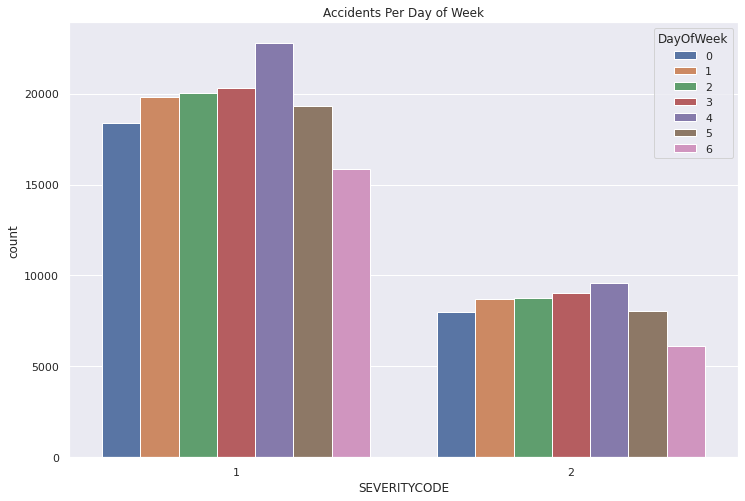

In [97]:
sns.countplot(data=df_time,x='SEVERITYCODE',hue='DayOfWeek').set_title("Accidents Per Day of Week")



> As we see, Fridays (day 4 in the plot) are more prone to both type of accidents. Friday marks the end of the weekdays, so drivers are more in a rush to go home and more reckless in their driving. Also weekends have much lesser accidents( property damage or injury) as people drive more during the weekdays than in the weekends. 


####  **Accidents over months**


> Following section shows a plot of number of accidents over different months.





Text(0.5, 1.0, 'Accidents Per Month')

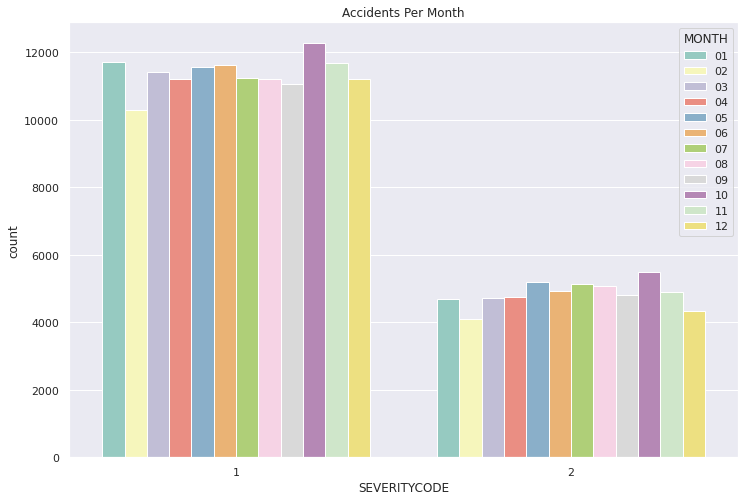

In [98]:
sns.countplot(data=df_time,x='SEVERITYCODE',hue='MONTH',  palette="Set3").set_title("Accidents Per Month")



> As evident from the plot, October has higher number of accidents than the others. As the start of the Fall season, drivers have to adjust to new weather and road condition and hence the increase in accidents. 



# **Statistical analysis**

### **Chi square analysis**

Chi square test is done to evaluate the relation between two categorical variables. Here, if the our calculated chi square value is higher than the critical chi square value then the variables in discussion indeed have a relation. If the variables have chi square value lower than the critical chi square value, then the variables in question are independent of each other. 

### **Chi Square** Value among different variables

In [99]:
import scipy.stats as scs

columns_list_for_matrix = {'SEVERITYCODE':df.SEVERITYCODE ,'COLLISIONTYPE': df.COLLISIONTYPE, 'JUNCTIONTYPE': df.JUNCTIONTYPE, 'WEATHER': df.WEATHER, 
                'ROADCOND': df.ROADCOND, 'LIGHTCOND': df.LIGHTCOND, 'UNDERINFL': df.UNDERINFL, 'STATUS': df.STATUS, 
                'PERSONCOUNT': df.PERSONCOUNT, 'PEDCOUNT': df.PEDCOUNT, 'PEDCYLCOUNT': df.PEDCYLCOUNT, 'VEHCOUNT': df.VEHCOUNT, 
                'HITPARKEDCAR': df.HITPARKEDCAR}
chi2_df = pd.DataFrame(columns=columns_list_for_matrix.keys())
for row, row_variable in columns_list_for_matrix.items():
    data = {'column': row}
    for column, column_variable in columns_list_for_matrix.items():
        chi2 = scs.chi2_contingency(pd.crosstab(row_variable, column_variable))
        data[column] = chi2[0]
    chi2_df = chi2_df.append(data, ignore_index=True)
chi2_df.set_index('column', inplace=True)

In [100]:
chi2_df

,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR
column,,,,,,,,,,,,,
SEVERITYCODE,194668.228110,4.107856e+04,8.172897e+03,5.013393e+03,5.116816e+03,4.823546e+03,512.356991,186.256270,6.105591e+03,1.238291e+04,8977.034087,1.114288e+04,2004.311235
COLLISIONTYPE,41078.556865,1.707921e+06,1.280086e+05,2.519112e+04,2.678622e+04,2.862211e+04,4608.660288,8.109438,9.438088e+04,1.803008e+05,187162.546596,1.499235e+05,19063.970940
JUNCTIONTYPE,8172.896833,1.280086e+05,1.130064e+06,5.206551e+03,5.604407e+03,6.391852e+03,3942.487920,229.095216,3.621641e+03,4.481650e+03,1943.888488,2.900010e+03,4825.010870
WEATHER,5013.393455,2.519112e+04,5.206551e+03,1.895920e+06,3.539509e+05,1.099408e+05,998.063016,1.755714,8.110407e+03,4.466655e+02,609.983046,2.883085e+03,2656.558243
ROADCOND,5116.816090,2.678622e+04,5.604407e+03,3.539509e+05,1.517288e+06,1.069218e+05,1152.497533,0.362701,9.166871e+03,3.813719e+02,610.912178,3.555454e+03,2718.435185
LIGHTCOND,4823.546033,2.862211e+04,6.391852e+03,1.099408e+05,1.069218e+05,1.516024e+06,11363.382060,0.477872,9.502331e+03,4.964605e+02,616.829139,4.801157e+03,2466.519405
UNDERINFL,512.356991,4.608660e+03,3.942488e+03,9.980630e+02,1.152498e+03,1.136338e+04,569367.000000,4.082272,8.129420e+03,2.489416e+02,338.714269,4.351426e+03,5786.348685
STATUS,186.256270,8.109438e+00,2.290952e+02,1.755714e+00,3.627013e-01,4.778716e-01,4.082272,194632.141526,4.489816e+03,1.852840e+02,145.306637,1.866621e+05,79.608863
PERSONCOUNT,6105.591277,9.438088e+04,3.621641e+03,8.110407e+03,9.166871e+03,9.502331e+03,8129.420401,4489.815609,8.954958e+06,3.041226e+03,826.861759,1.659871e+05,1679.104519


### **P Value** Value among different variables

The level of statistical significance is often expressed as a p-value between 0 and 1. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis which is there is no relationship between two variables .
Basically a small p-value indicates that the variables are highly dependent and correlated. From the table below it is clearly visible that many attributues are highly correlated with each others. 

In [101]:
import scipy.stats as scs

columns_list_for_matrix = {'SEVERITYCODE':df.SEVERITYCODE ,'COLLISIONTYPE': df.COLLISIONTYPE, 'JUNCTIONTYPE': df.JUNCTIONTYPE, 'WEATHER': df.WEATHER, 
                'ROADCOND': df.ROADCOND, 'LIGHTCOND': df.LIGHTCOND, 'UNDERINFL': df.UNDERINFL, 'STATUS': df.STATUS, 
                'PERSONCOUNT': df.PERSONCOUNT, 'PEDCOUNT': df.PEDCOUNT, 'PEDCYLCOUNT': df.PEDCYLCOUNT, 'VEHCOUNT': df.VEHCOUNT, 
                'HITPARKEDCAR': df.HITPARKEDCAR}
pval_df = pd.DataFrame(columns=columns_list_for_matrix.keys())
for row, row_variable in columns_list_for_matrix.items():
    data = {'column': row}
    for column, column_variable in columns_list_for_matrix.items():
        chi2 = scs.chi2_contingency(pd.crosstab(row_variable, column_variable))
        data[column] = chi2[1]
    pval_df = pval_df.append(data, ignore_index=True)
pval_df.set_index('column', inplace=True)

In [102]:
pval_df

,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,STATUS,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,HITPARKEDCAR
column,,,,,,,,,,,,,
SEVERITYCODE,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.001532e-110,2.087124e-42,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
COLLISIONTYPE,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.231563e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
JUNCTIONTYPE,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.194346e-46,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
WEATHER,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.315483e-190,9.978927e-01,0.000000e+00,1.741679e-60,2.268066e-116,0.000000e+00,0.000000e+00
ROADCOND,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.252748e-228,9.999610e-01,0.000000e+00,1.889932e-53,1.107520e-119,0.000000e+00,0.000000e+00
LIGHTCOND,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.998877e-01,0.000000e+00,8.056961e-76,6.147597e-121,0.000000e+00,0.000000e+00
UNDERINFL,1.001532e-110,0.000000,0.000000e+00,1.315483e-190,3.252748e-228,0.000000e+00,0.000000e+00,2.527162e-01,0.000000e+00,1.338553e-42,4.081658e-70,0.000000e+00,0.000000e+00
STATUS,2.087124e-42,0.523156,1.194346e-46,9.978927e-01,9.999610e-01,9.998877e-01,2.527162e-01,0.000000e+00,0.000000e+00,2.558930e-37,2.799398e-32,0.000000e+00,4.563736e-19
PERSONCOUNT,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.443688e-118,0.000000e+00,0.000000e+00


# **Feature Selection**

### XGBoost

Selecting important features for model is very challeging task specially when the number of features are very large and strongly dependent with prediction variable. Feature selection reduces the complexity of a model and makes it easier to interpret. It improves the accuracy of a model if the right subset is chosen. We have used XGBoost to select essential features.

We have also considered different feature set to train the model and reported the results.

In [103]:
features = ['STATUS', 'ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'HITPARKEDCAR', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'SEVERITYCODE']
feature_df = df[features]

In [104]:
# replacing values of UNDERINFL
feature_df.replace({'UNDERINFL': {'0':'N', '1':'Y'}}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [105]:
# replacing null values with mode
for column in feature_df:
    if feature_df[column].isnull().sum() > 0 :
        feature_df[column].fillna(feature_df[column].mode()[0], inplace=True)
feature_df.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


STATUS           0
ADDRTYPE         0
COLLISIONTYPE    0
JUNCTIONTYPE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
UNDERINFL        0
HITPARKEDCAR     0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
SEVERITYCODE     0
dtype: int64

In [106]:
X = feature_df.iloc[:, :-1]
Y = feature_df.iloc[:, -1:]

In [107]:
from sklearn import preprocessing

count_features = ['PERSONCOUNT',	'PEDCOUNT',	'PEDCYLCOUNT',	'VEHCOUNT']

# label encoding the columns with dtype string
label_encoder = preprocessing.LabelEncoder()
for column in X:
    if column in  count_features:
        continue
    X[column] = label_encoder.fit_transform(X[column])

print(X.head())

   STATUS  ADDRTYPE  COLLISIONTYPE  ...  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT
0       0         2              0  ...         0            0         2
1       0         1              9  ...         0            0         2
2       0         1              5  ...         0            0         3
3       0         1              4  ...         0            0         3
4       0         2              0  ...         0            0         2

[5 rows x 13 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


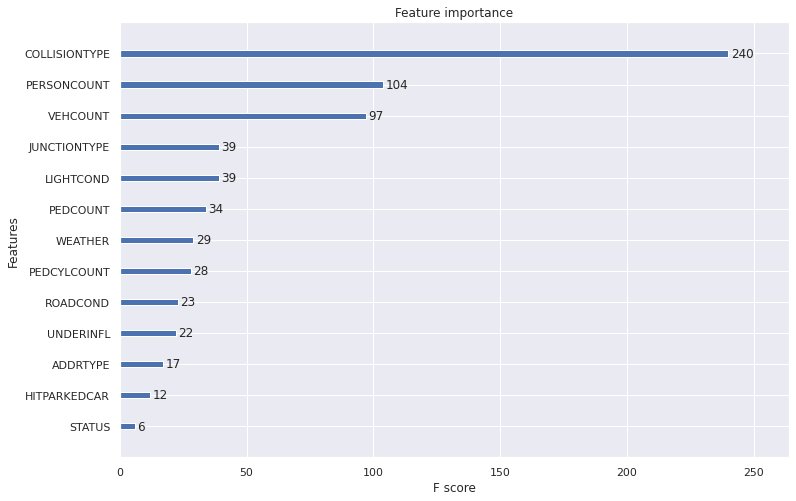

In [108]:
import matplotlib.pyplot as plt
import xgboost as xgb

feature_model = xgb.XGBClassifier()
feature_model.fit(X, Y)

xgb.plot_importance(feature_model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

# **Modeling For Severity Prediction**

In [109]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Data is highly imbalanced. Our task is to predict the severity caused by accidents in other words we need to find the injury class as good as possible. But the problem is there is very few samples for injury class. There are 136485 samples for property damage and only 58188 samples for injury. To mitigate this problem, we have used resampling like upsampling and downsampling.

We have trained different models like Support Vector Machine(Linear and RBF), Logistic Regression, Random Rorest,  k-neares Neighbors and Adaboost to predict the severity of the accidents. We have presented the results of different models in a tabular format.

For training the model to predict severity, we have used scikit-learn. We split the dataset into  80:20 train and test samples randomly using train_test_split. For upsampling and downsampling, we have used scikit-learns resample module.


In [110]:
pd.set_option('display.max_columns', None)  
df_features_map = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone Feature Map.csv')
df_features_map

,Set,Feature List,No of Features
0,Set 1,COLLISIONTYPE; PERSONCOUNT; VEHCOUNT,3
1,Set 2,COLLISIONTYPE; PERSONCOUNT; JUNCTIONTYPE,3
2,Set 3,PERSONCOUNT; PEDCOUNT; PEDCYLCOUNT; VEHCOUNT; ...,17
3,Set 4,COLLISIONTYPE,1


In [111]:
df_reasults = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone Project Result.csv')
df_reasults

,Model Type,Sample Type,Feature Set,Encoding,Accuracy,ROC AUC Score,Precision,Recall,F-1 score
0,Logistic Regression,Default,Set 3,One Hot,70.91,0.62,0.75,0.75,0.72
1,Logistic Regression,Downsample,Set 3,One Hot,70.40,0.70,0.71,0.70,0.70
2,Logistic Regression,Upsample,Set 2,One Hot,70.00,0.70,0.71,0.70,0.70
3,Random Forest,Default,Set 3,One Hot,73.09,0.64,0.71,0.73,0.72
4,Random Forest,Downsample,Set 3,One Hot,67.69,0.68,0.68,0.68,0.68
5,SVM(Linear),Upsample,Set 1,One Hot,69.86,0.70,0.71,0.70,0.70
6,SVM(Linear),Upsample,Set 4,One Hot,69.86,0.70,0.71,0.70,0.70
7,SVM(RBF),Upsample,Set 1,One Hot,70.91,0.71,0.67,0.82,NaN
8,SVM(RBF),Upsample,Set 2,One Hot,70.00,0.71,0.71,0.70,0.70
9,SVM(RBF),Upsample,Set 4,One Hot,69.86,0.70,0.71,0.70,0.70


We have achieved highest results using Adaboost classification model with upsampling data while using features COLLISIONTYPE, PERSONCOUNT, VEHCOUNT in terms of all evaluation metrics. We have selected these features with the help of XGBoost.


# **Conclusion**

After the thorough analysis, we see that most accidents occur during the day and during weekdays. Also the type of collision and junctions suggest that most dangerous places in Seattle city traffic is the intersections which are connected to other intersections. The heavy traffic in these locations and drivers being reckless during rush hour seem to be a big contributing factor in case of accidents.

If we were to suggest any preventive measures from our analysis, we would suggest the drivers to be more cautious in rush hours and good weather condition, as we also found most accidents occur in clear weather. Therefore, the causes of accidents depend more on the drivers' skill and carefulness. 

We prepared a predictive system that would predict the severity of accidents occurred if the system is given the type of collision, number of people involved and the number of vehicles involved. The predictive model is prepared with ADABOOST, where we achieved the highest accuracy and roc-auc score - 70.66% and 0.71 respectively. 

For future analysis and building predictive model, we would suggest verifying the relationship of accident occurrence time with accidents more closely and prepare models based on that. Also we would suggest using a more balanced data set- if unavailable balancing the data set with some sophisticated techniques other than random resampling. 
